# Anemia - Support Vector Machine

In [2]:
import some_load_train_evaluate_functions as ml

In [3]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [4]:
# Anemia data

anemia_df = ml.get_data_of_disease(driver, 'Anemia')
anemia_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Anemia
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
8878,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8879,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8880,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [5]:
svm_classifier = ml.LinearSVC(random_state=42)

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

svm_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = svm_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, svm_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9617171006333568
Testing Accuracy:  0.9625563063063063


## Feature Selection

### Correlation Analysis

In [6]:
svm_classifier_test = ml.LinearSVC(random_state=42)

In [7]:
pos_corr, neg_corr = ml.get_correlated_features(anemia_df,'Anemia',pos=0.04,neg=-0.04)

corr_features = list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features

['Red cell distribution width [%]',
 'Transferrin receptor [nmol/L]',
 'Platelet_Lymphocyte Ratio',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Trans-lycopene [umol/L]',
 'Blood selenium [umol/L]',
 'LDL_HDL Ratio',
 'Total Lycopene [umol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Bicarbonate [mmol/L]',
 'Lymphocyte [%]',
 'Mean cell volume [fL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Alanine Aminotransferase [U/L]']

In [8]:
ml.evaluate_feature_set(corr_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.961

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### SelectFromModel

In [9]:
sfm_features = ml.select_from_model_features(svm_classifier_test,X,y)
sfm_features

['Gender',
 'Globulin [g/dL]',
 'Hematocrit [%]',
 'Iron frozen [umol/L]',
 'Lymphocyte [%]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Segmented neutrophils [%]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Iron Binding Capacity [umol/L]',
 'Total Protein [g/dL]',
 'UIBC [umol/L]',
 'Albumin [g/dL]',
 'Hemoglobin [g/dL]']

In [10]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### SelectKBest

In [11]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin receptor [nmol/L]',
 'RBC count [million cells/uL]',
 'Albumin [g/dL]',
 'Gender',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Mean cell hemoglobin [pg]',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Age',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Total Calcium [mg/dL]',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Bilirubin [mg/dL]',
 'Globulin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Mean cell volume [fL]',
 'Segmented neutrophils [%]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Lymphocyte [%]']

In [12]:
ml.evaluate_feature_set(k_best_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### Recursive Feature Elimination (RFE) 

In [13]:
rfe_features = ml.select_rfe_features(svm_classifier_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Mean cell volume [fL]',
 'Retinyl palmitate [umol/L]',
 'Red cell distribution width [%]',
 'RBC count [million cells/uL]',
 'Globulin [g/dL]',
 'Glycohemoglobin [%]',
 'Segmented neutrophils [%]',
 'Hematocrit [%]',
 'Iron frozen [umol/L]',
 'Platelet_Lymphocyte Ratio',
 'Lymphocyte [%]',
 'Osmolality [mmol/Kg]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Hydroxycotinine [ng/mL]',
 'Sodium [mmol/L]',
 'Retinyl stearate [umol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Transferrin Saturation [%]',
 'Hemoglobin [g/dL]',
 'Creatine Phosphokinase [IU/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Total Lycopene [umol/L]',
 'Total Protein [g/dL]',
 'Trans-lycopene [umol/L]',
 'UIBC [umol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Albumin [g/dL]',
 'A/G Ratio']

In [14]:
ml.evaluate_feature_set(rfe_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### Lasso Regularization

In [15]:
l1_selected_features = ml.svc_lasso_select(X_train, y_train, C=0.5)
l1_selected_features[:30]

['Systemic Immune‐inflammation Index (SII)',
 'Gender',
 'Hematocrit [%]',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Osmolality [mmol/Kg]',
 'Neutrophil_Lymphocyte Ratio',
 'Sodium [mmol/L]',
 'Iron frozen [umol/L]',
 'Red cell distribution width [%]',
 'Retinyl palmitate [umol/L]',
 'Transferrin Saturation [%]',
 'Glycohemoglobin [%]',
 'Total Cholestrol_HDL Ratio',
 'Platelet count [1000 cells/uL]',
 'Hydroxycotinine [ng/mL]',
 'Total Iron Binding Capacity [umol/L]',
 'UIBC [umol/L]',
 'Retinyl stearate [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Trans-lycopene [umol/L]',
 'Platelet_Lymphocyte Ratio',
 'Blood mercury [nmol/L]',
 'A/G Ratio',
 'Triglyceride [mmol/L]',
 'Alpha-crypotoxanthin [umol/L]',
 'Non_HDL Ratio',
 'Trans-beta-carotene [umol/L]',
 'Total Bilirubin [mg/dL]',
 'Total Lycopene [umol/L]']

In [16]:
ml.evaluate_feature_set(l1_selected_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 1.000

Recall: 0.029

F1-Score: 0.057


### Relief F

In [17]:
relieff_features = ml.relief_feature_select(30,X,y, n_jobs=-1)

In [18]:
relieff_features[:30]

['Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Segmented neutrophils [%]',
 'Lymphocyte [%]',
 'BMI',
 'Neutrophil_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Red cell distribution width [%]',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Gender',
 'Albumin [g/dL]',
 'Uric Acid [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Osmolality [mmol/Kg]',
 'Iron frozen [umol/L]',
 'Retinol [umol/L]',
 'Total Calcium [mg/dL]',
 'Chloride [mmol/L]',
 'Non_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'UIBC [umol/L]',
 'Globulin [g/dL]',
 'Blood selenium [umol/L]',
 'Bicarbonate [mmol/L]']

In [19]:
ml.evaluate_feature_set(relieff_features[:30], svm_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### Optimal no. of features

In [20]:
final_features = list(l1_selected_features) 

Finding optimal no. of features..: 100%|████████| 85/85 [07:42<00:00,  5.44s/it]


Maximum accuracy = 0.9623 for 31 features


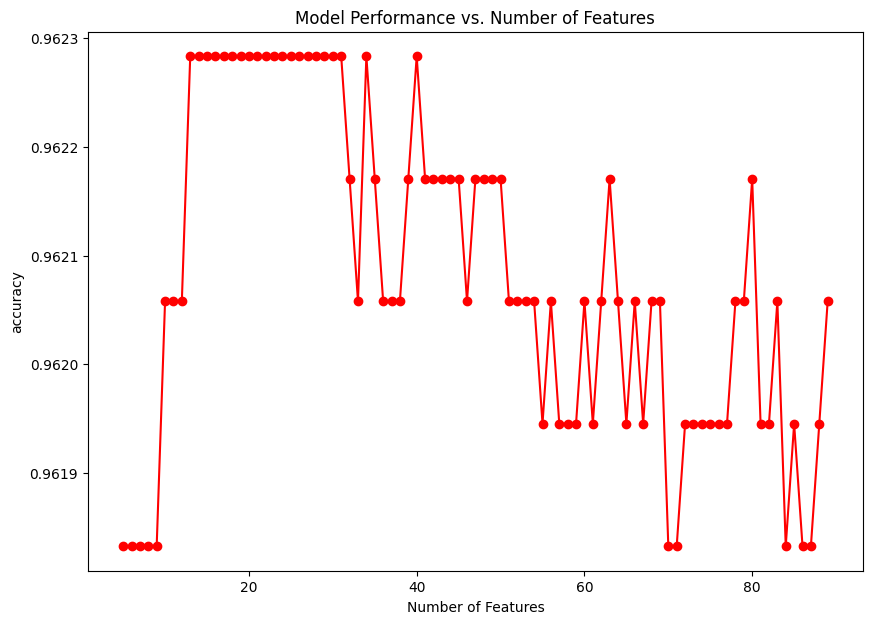

In [21]:
# Optimal no. of features

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [07:36<00:00,  5.38s/it]


Maximum f1 = 0.0283 for 69 features


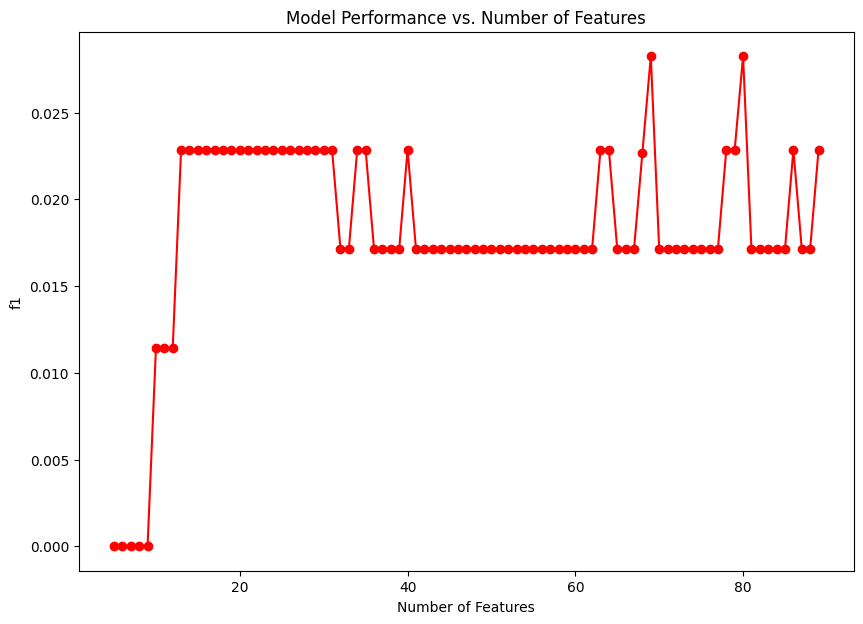

In [22]:
# Optimal no. of features

ml.plot_num_feature_performance(svm_classifier_test,  X, y, final_features, scoring='f1')

In [24]:
num_features = 69

selected = final_features[:num_features]
selected.append('Anemia')

anemia_df = anemia_df[selected]

In [25]:
# Save feature set
    
with open('../Models/Anemia/Feature Sets/SVM Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [26]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [27]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.800

Recall: 0.029

F1-Score: 0.057


### Mode Imputation

In [28]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [29]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.961

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### k-NN Imputation

In [30]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [31]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### Multiple Imputation by Chained Equations (MICE)

In [32]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [33]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 1.000

Recall: 0.022

F1-Score: 0.043


### Median Imputation

In [34]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [35]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 1.000

Recall: 0.015

F1-Score: 0.029


### Mean Imputation

In [36]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [37]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 1.000

Recall: 0.022

F1-Score: 0.043


### Dropping Null Values

In [38]:
# Drop null values
anemia_df_na = anemia_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df_na, label = 'Anemia',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [39]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.952

Test Accuracy: 0.952

Precision: 0.714

Recall: 0.208

F1-Score: 0.323


## Oversampling and Undersampling

### Random Oversampling

In [40]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

svm_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(svm_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.889

Test Accuracy: 0.852

Precision: 0.267

Recall: 0.958

F1-Score: 0.418


### SMOTE (Synthetic Minority Over-sampling Technique)

In [41]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

svm_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(svm_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.900

Test Accuracy: 0.861

Precision: 0.269

Recall: 0.875

F1-Score: 0.412


### Random Undersampling

In [42]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

svm_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(svm_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 1.000

Test Accuracy: 0.677

Precision: 0.146

Recall: 1.000

F1-Score: 0.255


### Tomek Links

In [43]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

svm_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(svm_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.951

Test Accuracy: 0.952

Precision: 0.667

Recall: 0.250

F1-Score: 0.364


### SMOTE + Tomek Links

In [44]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

svm_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(svm_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.900

Test Accuracy: 0.861

Precision: 0.269

Recall: 0.875

F1-Score: 0.412


In [72]:
# tomek provides better results

X_train, y_train = X_tomek, y_tomek

svm_classifier.fit(X_train, y_train)
ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.951

Test Accuracy: 0.952

Precision: 0.667

Recall: 0.250

F1-Score: 0.364


## Hyperparameter Optimization 

### Grid Search

In [84]:
param_grid = {
    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [False], 
    'class_weight': [None, 'balanced'] 

}

In [85]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(svm_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='f1')

In [86]:
grid_best_params

{'C': 100,
 'class_weight': 'balanced',
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2'}

In [87]:
ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.873

Test Accuracy: 0.871

Precision: 0.300

Recall: 1.000

F1-Score: 0.462


### Random Search

In [88]:
rand_best_params, svm_classifier_rand = ml.random_search_optimize(svm_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='f1')

In [89]:
rand_best_params

{'penalty': 'l2',
 'loss': 'squared_hinge',
 'dual': False,
 'class_weight': None,
 'C': 10}

In [90]:
ml.evaluate_model_metrics(svm_classifier_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.951

Test Accuracy: 0.952

Precision: 0.667

Recall: 0.250

F1-Score: 0.364


### Optuna

In [91]:
def objective(trial):

    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    dual = False
    
    if penalty == 'l1' or penalty == 'l2' and loss == 'hinge':
        raise ml.optuna.TrialPruned()

    model = ml.LinearSVC(C=C, loss=loss, penalty=penalty, class_weight=class_weight, dual=dual, random_state=42)
            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1_score = ml.f1_score(y_test, y_pred)

    return f1_score

In [92]:
best_trial , svm_classifier_opt = ml.optuna_optimize(objective, ml.LinearSVC, n_trials=150)

In [93]:
best_trial

{'C': 612.6142873518589,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'class_weight': None}

In [94]:
svm_classifier_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.926

Test Accuracy: 0.928

Precision: 0.333

Recall: 0.292

F1-Score: 0.311


## Evaluation on Test Set


Train Accuracy: 0.951

Test Accuracy: 0.949

Precision: 0.786

Recall: 0.367

F1-Score: 0.500

Confusion Matrix:

[[400   3]
 [ 19  11]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97       403
     Class 1       0.79      0.37      0.50        30

    accuracy                           0.95       433
   macro avg       0.87      0.68      0.74       433
weighted avg       0.94      0.95      0.94       433


ROC-AUC Curve:


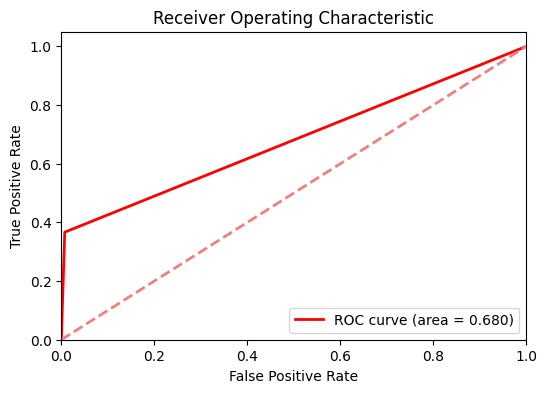

In [95]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(svm_classifier, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [96]:
ml.k_cross_validate(svm_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9266055  0.93577982 0.89908257 0.94444444 0.96296296 0.92592593
 0.90740741 0.93518519 0.94444444 0.93518519]

Mean accuracy score:  0.9317023445463812

Standard deviation:  0.017482771943795734


In [97]:
ml.k_cross_validate(svm_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.78899083 0.77981651 0.81651376 0.80555556 0.78703704 0.76851852
 0.74074074 0.76851852 0.87962963 0.84259259]

Mean accuracy score:  0.7977913693510025

Standard deviation:  0.03821025449492225


In [98]:
ml.k_cross_validate(svm_classifier_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91743119 0.93577982 0.89908257 0.94444444 0.96296296 0.91666667
 0.90740741 0.93518519 0.94444444 0.93518519]

Mean accuracy score:  0.9298589874277947

Standard deviation:  0.018419788515408014


In [99]:
ml.k_cross_validate(svm_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9266055  0.87155963 0.87155963 0.92592593 0.87037037 0.89814815
 0.91666667 0.90740741 0.93518519 0.91666667]

Mean accuracy score:  0.9040095141012572

Standard deviation:  0.023593897997302563


### Stratified K-fold

In [100]:
ml.stratified_k_cross_validate(svm_classifier,X,y,n_splits=10)


Average Accuracy: 0.9372239211688752

Average Precision: 0.4066666666666666

Average Recall: 0.15476190476190474

Average F1-Score: 0.21944444444444441


In [101]:
ml.stratified_k_cross_validate(svm_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.7968314644920149

Average Precision: 0.1587118557486071

Average Recall: 0.5380952380952381

Average F1-Score: 0.24365276884561599


In [102]:
ml.stratified_k_cross_validate(svm_classifier_rand,X,y,n_splits=10)


Average Accuracy: 0.9335202174651716

Average Precision: 0.36

Average Recall: 0.14047619047619048

Average F1-Score: 0.19469696969696967


In [103]:
ml.stratified_k_cross_validate(svm_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.9021406727828747

Average Precision: 0.24561688311688307

Average Recall: 0.26904761904761904

Average F1-Score: 0.24761051813683393


### Save Model

In [105]:
final_svm_estimator = svm_classifier

In [106]:
# Saving the model

ml.save_model(final_svm_estimator, "../Models/Anemia/SVM.pkl")

Saved Model


## Prediction

In [107]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [ 1.          0.20650595  0.77773885 -0.06055646  0.53984485  1.53757634
  0.2055169   0.97123056  1.57792866 -0.82988427 -0.39948912  1.16928035
  0.9780733   0.05442071  0.06353738 -0.35195645  0.34163181 -0.63617805
 -0.13585269  1.16287633 -1.39199067 -0.05676183 -0.05579603  0.36047181
  0.03072536  1.48071796  0.00946235 -0.07652204  1.51639292 -1.24579406
 -0.42669737  0.317083    0.36812635 -0.09177387  1.04885957  1.58541935
 -0.03983901 -0.40839005 -0.5050562  -0.23911808 -0.44622562  0.007715
 -0.09485165 -1.67592344 -0.4423195   0.06005323  0.3167757   0.36123405
  3.05010286  1.5916959   1.38740719 -0.55737237 -0.00711089 -0.04489768
 -0.3923834  -0.09465511  0.24663457 -0.21156848  1.15737822 -0.57370177
  0.1711738   1.26837499 -0.26866171 -0.39234611  0.08636038  0.43949911
  0.29726921  1.07543358 -0.50587555]

Expected Class:  0

 Modified Instance:
 [ 1.          0.31594992  0.89722915 -0.14193839  0.31945813  1.79369037
  0.16895306  1.23319208  1.5787726

In [110]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[5], y_test.iloc[5], 0.3)

Instance:
 [ 0.         -0.35902681 -0.40860137 -0.90785776 -1.03618962  1.02695083
 -0.02768196 -0.84851341 -0.40533727 -0.43967915 -0.39948912 -0.50762084
  3.84846463  0.42890525 -0.84232568 -0.35195645  0.40397818  0.5573028
 -0.13585269  1.52463037 -0.89511733 -0.30570783 -0.24119361  0.38459038
  0.37835217 -0.4666948   0.12942535 -0.78977041  1.14097947 -1.04300483
 -0.71950237 -0.36400557  0.74164411 -0.07539416 -0.21531912 -0.56598643
  0.35960375 -0.40839005 -0.32510106 -0.794841   -0.12812076  0.03369629
 -0.57933249  1.06399573  0.09209961  0.31666228  0.47848384 -0.61086061
 -0.01086415 -0.59163353  5.33562582 -0.18792386  0.0560929  -0.44100837
 -2.47281623  0.27085317 -0.97455205 -0.21156848 -0.2961551  -0.57370177
 -1.12914649 -0.78319905 -0.88165613  0.14041831  0.39559786 -0.52990427
 -0.23134503 -0.24307904 -0.12631061]

Expected Class:  1

 Modified Instance:
 [ 0.00000000e+00 -3.05942688e-01 -1.47124497e-01 -7.46967474e-01
 -9.25117581e-01  1.03234841e+00 -3.170234

In [114]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[26], y_test.iloc[26], 0.3)

Instance:
 [ 0.          0.09837686 -3.14630956 -0.07568684  0.11700633 -1.01555119
 -0.08238293 -1.576411   -1.46094655  1.35526436  0.69748299 -1.17838132
 -0.25209442 -1.08943485  0.43837727 -0.35141371 -1.16738123 -0.08939729
 -0.13585269 -1.15234954  0.87591636  0.33189161 -0.21640784 -1.37345811
 -1.14719475  0.57656204 -0.27660325  3.17653062 -0.73608782  0.83887928
  0.74452266 -0.34731222 -0.75242696 -0.479427   -1.16345313 -0.74345059
 -1.00785086 -0.40805596  0.17323626  0.10820875  1.47140654  0.0586783
  1.97520288  3.84625361 -1.19050625  1.68524388 -0.13802845 -0.07003691
 -0.27100299 -0.04580118 -0.51619821  1.28987015 -0.09014332 -0.33676872
 -0.73912221 -0.41142895  0.4176007  -0.21156848 -0.41206185 -0.45927853
 -1.34586654  0.03743057  0.93755311  0.30251196 -0.94596487 -0.06828361
  1.61880479 -1.02439755 -0.75891884]

Expected Class:  1

 Modified Instance:
 [ 0.00000000e+00  4.15636746e-02 -3.13907839e+00 -8.75818890e-02
  1.72960231e-01 -1.04879374e+00 -1.520153